In [123]:
from qutip import Bloch, basis, sigmax, sigmaz, sigmay, mesolve, tensor, qeye
import matplotlib.pyplot as plt
import numpy as np

In [124]:
# Variables

omega_01 = 500
omega_02 = 100

omega_11 = 0.4
omega_12 = 0.4

phi_1 = 0
phi_2 = 0

J = 200

tf = 10000
t = np.linspace(0, tf, 5000)

spin_up = basis(2, 0)
spin_down = basis(2, 1)

sx = sigmax()
sy = sigmay()
sz = sigmaz()

id = qeye(2)

In [125]:
# Transformation Operator
U_R = []
for time in t:
    ur_0 = ((-1j * omega_01 * time) / 2) * sz
    ur_1 = ((-1j * omega_02 * time) / 2) * sz

    U_R.append(tensor(ur_0.expm(), ur_1.expm()))

In [126]:
# Initial condition

state_00 = tensor(spin_down, spin_down)
state_01 = tensor(spin_down, spin_up)
state_10 = tensor(spin_up, spin_down)
state_11 = tensor(spin_up, spin_up)

psi_0 = state_01

In [127]:
# Hamiltonian

H0 = J * tensor(0.5 * sz, 0.5 * sz)
H1 = omega_11 * (np.cos(phi_1) * tensor(0.5 * sx, id) + np.sin(phi_1) * tensor(0.5 * sy, id))
H2 = omega_12 * (np.cos(phi_2) * tensor(id, 0.5 * sx) + np.sin(phi_2) * tensor(id, 0.5 * sy))

H = H0 + H1 + H2

In [128]:
# Solving the Schrödinger Equation

result = mesolve(H, psi_0, t)

In [129]:
psi_t = []
for index, state in enumerate(result.states):
    psi_t.append(U_R[index].dag() * state)
    

In [130]:
# Obtaining the probabilities

prob_00 = []
prob_01 = []
prob_10 = []
prob_11 = []
for state in psi_t:
    amp_00 = (state_00.dag() * state)[0][0][0]
    prob_00.append(np.abs(amp_00)**2)

    amp_01 = (state_01.dag() * state)[0][0][0]
    prob_01.append(np.abs(amp_01)**2)

    amp_10 = (state_10.dag() * state)[0][0][0]
    prob_10.append(np.abs(amp_10)**2)

    amp_11 = (state_11.dag() * state)[0][0][0]
    prob_11.append(np.abs(amp_11)**2)

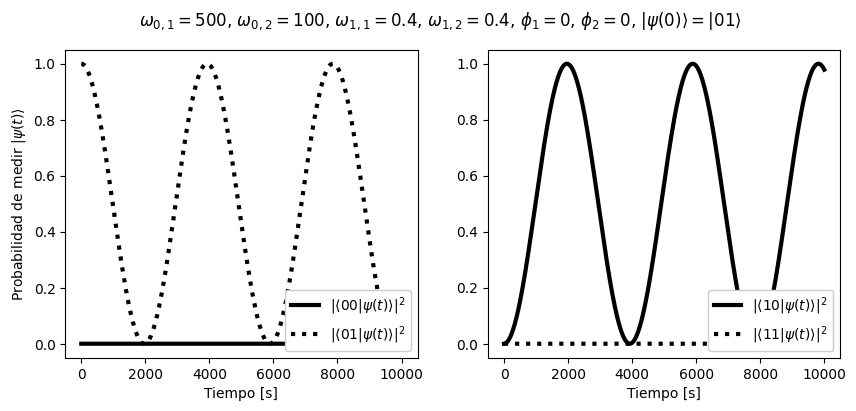

In [131]:
# Plotting the probabilities

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

width = 3
color = 'black'

axes[0].plot(t, prob_00, color=color, linewidth=width, linestyle='-', label=r'$|\langle 00 | \psi (t) \rangle|^2$')
axes[0].plot(t, prob_01, color=color, linewidth=width, linestyle=':', label=r'$|\langle 01 | \psi (t) \rangle|^2$')

axes[0].set_xlabel('Tiempo [s]')
axes[0].set_ylabel(r'Probabilidad de medir $| \psi (t) \rangle$')
axes[0].legend(loc='lower right', framealpha=1)

axes[1].plot(t, prob_10, color=color, linewidth=width, linestyle='-', label=r'$|\langle 10 | \psi (t) \rangle|^2$')
axes[1].plot(t, prob_11, color=color, linewidth=width, linestyle=':', label=r'$|\langle 11 | \psi (t) \rangle|^2$')

axes[1].set_xlabel('Tiempo [s]')
axes[1].legend(loc='lower right', framealpha=1)

if psi_0 == state_00:
    init_cond = r'$| \psi (0) \rangle = | 00 \rangle$'
elif psi_0 == state_01:
    init_cond = r'$| \psi (0) \rangle = | 01 \rangle$'
elif psi_0 == state_10:
    init_cond = r'$| \psi (0) \rangle = | 10 \rangle$'
elif psi_0 == state_11:
    init_cond = r'$| \psi (0) \rangle = | 11 \rangle$'

text_0 = r'$\omega_{0, 1} = $' + f'{omega_01}, '
text_1 = r'$\omega_{0, 2} = $' + f'{omega_02}, '
text_2 = r'$\omega_{1, 1} = $' + f'{omega_11}, '
text_3 = r'$\omega_{1, 2} = $' + f'{omega_12}, '
text_4 = r'$\phi_1 = $' + f'{phi_1}, '
text_5 = r'$\phi_2 = $' + f'{phi_2}, '
fig.suptitle(text_0 + text_1 + text_2 + text_3 + text_4 + text_5 + init_cond)

plt.show()